### Exploratory analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [2]:

# load iris dataset
# quickly learn about dataset features and target > https://archive.ics.uci.edu/ml/datasets/iris
X, y = datasets.load_iris(as_frame=True, return_X_y=True)


print("Priting features pandas dataframe: \n\n", X.head())
print("\n\nPriting target pandas series:\n\n", y.head())

# run some exploratory analysis using pandas methods such as info, describe
# ...

Priting features pandas dataframe: 

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Priting target pandas series:

 0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


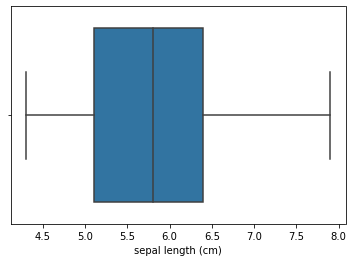

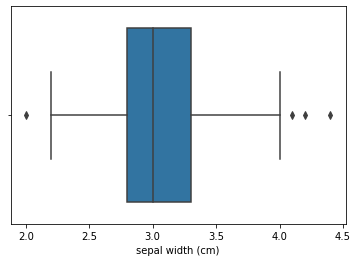

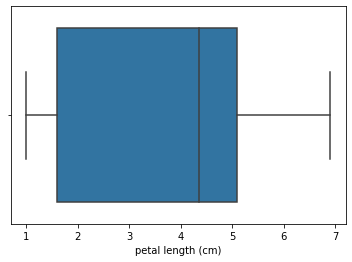

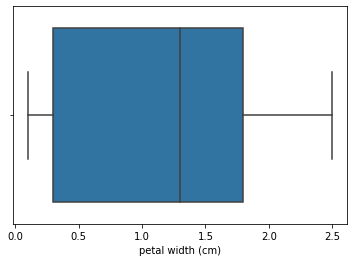

In [5]:
for i in range(4):
    sns.boxplot(X[X.columns[i]])
    plt.show()

In [6]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [8]:
# Concatenate X and y column-wise
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
'''Outlier Detection and Removal'''

# IQR
# Calculate the upper and lower limits
Q1 = df['sepal width (cm)'].quantile(0.25)
Q3 = df['sepal width (cm)'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['sepal width (cm)'] >= upper)[0]
lower_array = np.where(df['sepal width (cm)'] <= lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

New Shape:  (146, 5)


<AxesSubplot:>

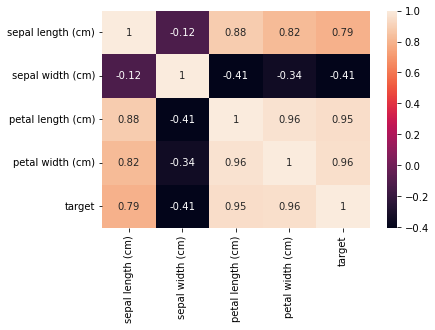

In [10]:
# Correlation check
sns.heatmap(df.corr(), annot=True)

In [11]:
# NOTE: Columns are very less, so not removing any based on correlation

In [12]:
# Optional (IF THERE IS TIME only)
# using matplotlib creat a 2 scatter plot of the data using plt.scatter method
# as x and y of the scatter, you can pass "sepal" feature from X in the first chart and "width" features from the second.
# c parameter can be target y series
# see an example here > https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py
# s parameter is not necessary

# ...


# would you make any other charts?


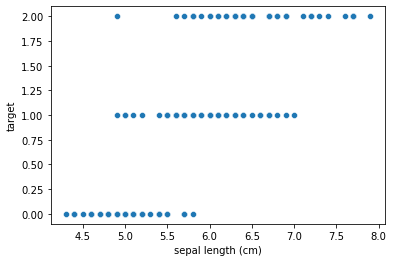

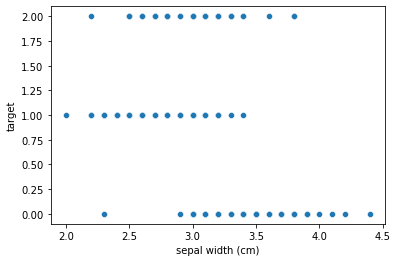

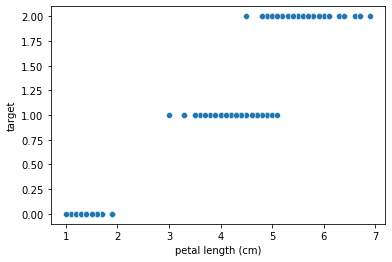

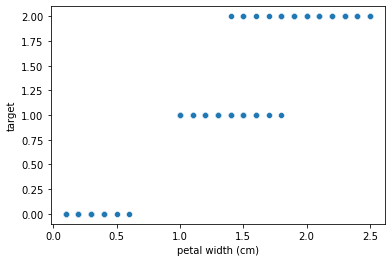

In [13]:
for i in range(4):
    sns.scatterplot(X[X.columns[i]], y)
    plt.show()

### Train a classifier model

In [14]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [15]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [17]:
# split train and test using model_selection function from sklearn. This returns a tuple cointaining:
# X_train, X_test, y_train, y_test
# you can use test_size=0.33, random_state=42 parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)


# split train and test
# <insert your code here>

# train a linear support vector machine to train the data
# if the model fails to converge, set the max_iter parameter to 10000
svc = LinearSVC()


# <insert code to fit classifer>
svc.fit(X_train, y_train)


# now get predictions for test set
# <insert code to predict classier here>
y_pred = svc.predict(X_test)
y_pred

array([2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0])

### Accuracy

Accuracy of the model is : 0.9333333333333333
F1-Score of the model is : 0.9333333333333333


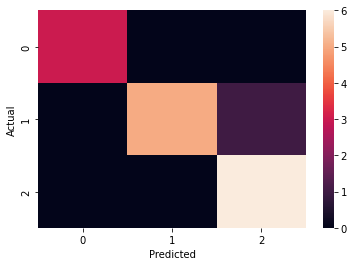

In [18]:
# let's create a multiclass confusion matrix
# and a f1 score to understand goodness of the model



# create a confusion matrix using sklearn confusion_matrix
# plt confusion matrix using seaborn heatmap
# x label is predicted values and y is actual values
# ...
cf = confusion_matrix(y_pred = y_pred, y_true = y_test)
sns.heatmap(cf)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# run f1 score from sk learn > https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
# ...
print(f"Accuracy of the model is : {accuracy_score(y_true = y_test, y_pred = y_pred)}")
print(f"F1-Score of the model is : {f1_score(y_true = y_test, y_pred = y_pred, average='micro')}")

# interpret results